# Advanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

A model with an order higher than that of another model will have a greater flexiblity, making it fit to the training data better, which results in its training RSS being smaller when compared with the one of a model of lower order. Taking this into account, <u>the training RSS will be higher for the linear model</u>, when compared with the cubic one.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

In this case, we know that the actual relation between X and Y is linear. So the true regression function is linear, meaning that there is only a small decrease in bias as flexibility increases (i.e., the order of the model increases), and so the test RSS declines slightly before rapidly increasing as the variance increases. Therefore, the linear model will produce more accurate predictions when compared to the cubic model. Consequently, it is expected that <u>the test RSS will be smaller for the linear model</u>, when compared to the cubic one.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

In this case, we don't have enough information to know the actual relation between X and Y. That being said, the order could either be fractional, quadratic, cubic or take any other higher value. Since the cubic model has a higher order, it will fit better to the data, regardless of the order of the relation between X and Y, when comparing with the linear model. In conclusion, <u>the training RSS is higher for the linear model</u>, in comparision with the cubic model.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

As stated before, in this case we don't know the order of the relation between X and Y, so we can't fully assess the Bias-Variance Tradeoff, because, if the true relation between X and Y is close to linear, there will only be a small decrease in bias as flexibility increases, and so the test RSS declines slighty before rapidly increasing. But if the true relation between X and Y is, for instance, cubic, the linear model will be too biased to produce very accurate results. In short, <u> we don't have enough information</u> to compare the test RSS between the linear and cubic models.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.a)** Load the dataset `penguins_size.csv`.

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
df = pd.read_csv(os.path.abspath('penguins_size.csv'))
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### **2.b)** Discard any row that has a missing value.

In [6]:
df = df.dropna(axis=0)
df.head(20)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [ ]:
df2 = df.iloc[:,[0,1,5,6]]
print(df2.groupby(['island','species','sex'])['body_mass_g'].count())

island     species    sex   
Biscoe     Adelie     FEMALE    22
                      MALE      22
           Gentoo     FEMALE    58
                      MALE      61
Dream      Adelie     FEMALE    27
                      MALE      28
           Chinstrap  FEMALE    34
                      MALE      34
Torgersen  Adelie     FEMALE    24
                      MALE      23
Name: body_mass_g, dtype: int64


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

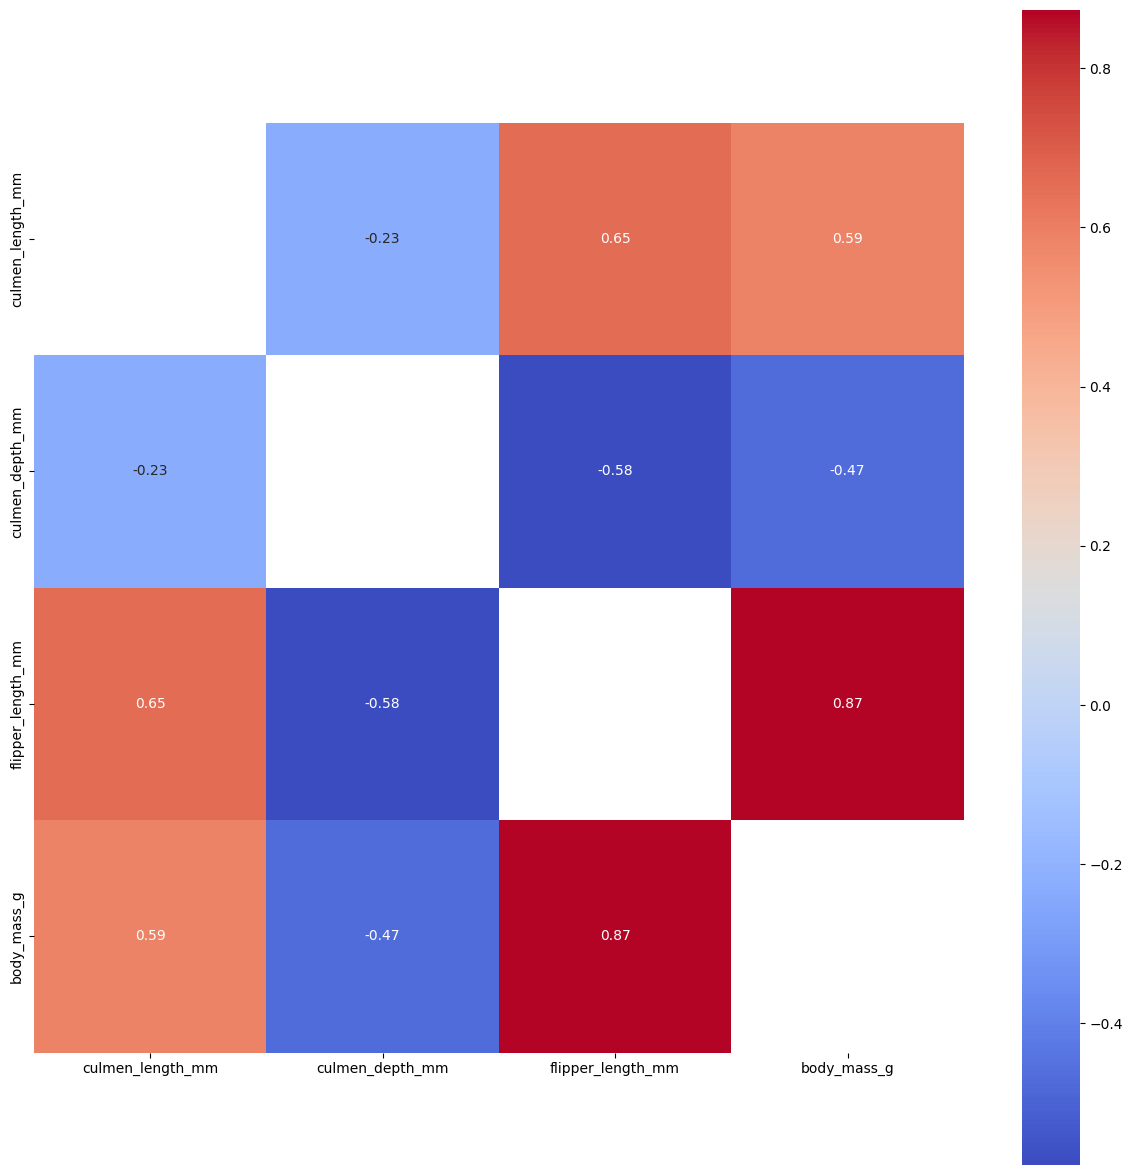

In [ ]:
from scipy.stats import pearsonr
df_corrs = df.corr(numeric_only=True, method='pearson')
pval = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['flipper_length_mm'].values.reshape(-1, 1)
y = df['body_mass_g'].values.reshape(-1, 1)
regr = LinearRegression()
regr.fit(X, y)

print('body_mass_g = {:.4f} + {:.4f} * flipper_length_mm '.format(regr.intercept_[0], regr.coef_[0][0]))
medv_pred = regr.predict(X)
r2_value = r2_score(y, medv_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -5872.0927 + 50.1533 * flipper_length_mm 
R^2: 0.7621


COMMENT: The $R^2$ expresses how much variance of the data is explained by the linear model (see reference *). Therefore, high values of $R^2$ are desirable and symbolize that X and Y are related. In this case, we got a $R^2$ = 0.7621, which is relatively high, meaning that this linear model explains 76.21% of the variance of the data (Y) through the predictors (X). As a result, flipper_length_mm was a good choice of predictor.

\* https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o

**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

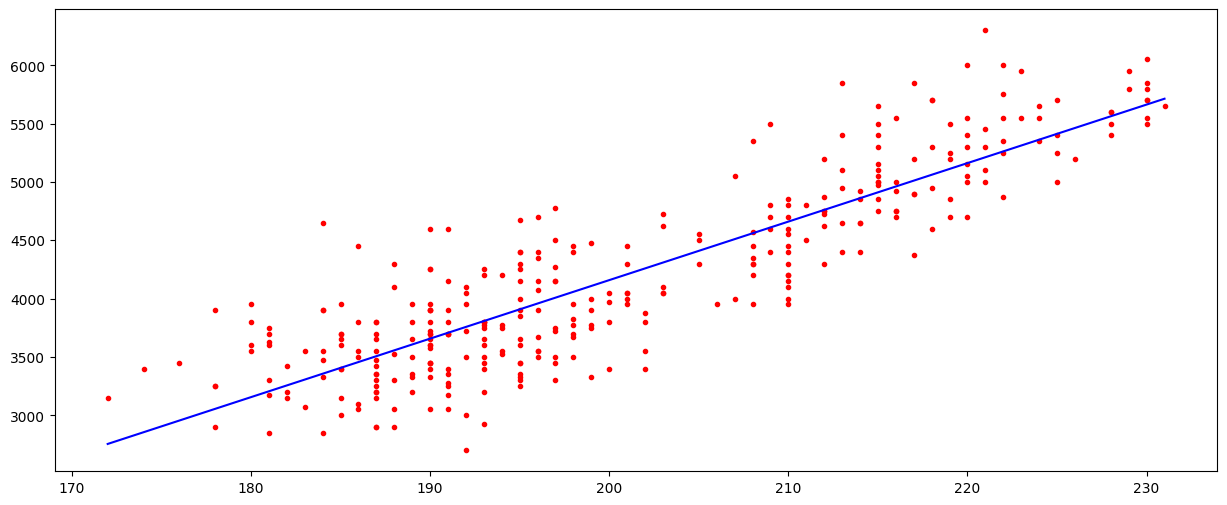

In [ ]:
limits_flipper_length_mm = np.array([min(X), max(X)])
body_mass_g_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_flipper_length_mm
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['flipper_length_mm'], df['body_mass_g'], '.r')
plt.plot(limits_flipper_length_mm ,body_mass_g_vals, 'b-')
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [ ]:
result_2g = regr.intercept_[0] + regr.coef_[0][0]*50
print(result_2g)

-3364.4293857307684


COMMENT:

The model predicted a body mass of -3364.43 kg, which is impossible. In this dataset, there was only data from adult penguins; in turn, the model obtained will only be suitable for adult penguins and not for the baby ones. This explains the negative value for the mass of the baby penguin.

In fact, we considered only one predictor for the body mass of a baby penguin, and assume their relation to be linear, further proving that, if we were to include a wider range of data, the order of our regression would most likely need to increase, in order to make more sense on a global scale.

**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [ ]:
cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']
X = df[cols].values
y = df['body_mass_g'].values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X,y)

print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1],regr.coef_[0][2]))

body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -6445.4760 + 3.2929 * culmen_length_mm + 17.8364 * culmen_depth_mm + 50.7621 * flipper_length_mm
R^2: 0.7639


COMMENT: The model with all the numeric predictors got a $R^2$ = 0.7639. On the other hand, the model with only one predictor got a $R^2$ = 0.7621. The diference is minimal, which may mean that some of the predictors used here may not be relevant enough in relation to Y. In any case, it makes sense for this one to be higher, since we are considering more predictors here.

**2.i)** Perform a multiple linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [ ]:
# Converts non-numeric columns into separate boolean columns, for each different category
df_2i = pd.get_dummies(df,columns = ['species', 'island'],dtype=int)
df_2i['sex'] = (df_2i['sex'] == "MALE").astype(int)

# Define X and y for the regression
X = df_2i.drop(['body_mass_g'],axis=1).values
#X = df_2i.drop(['body_mass_g','species_Gentoo','island_Torgersen'],axis=1).values
y = df_2i['body_mass_g'].values.reshape(-1, 1)

# Initialize linear regression
regr = LinearRegression()
regr.fit(X,y)

# Print linear regression expression
print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm + {:.4f} * sex + {:.4f} * species_Adelie + {:.4f} * species_Chinstrap + {:.4f} * species_Gentoo + {:.4f} * island_Biscoe + {:.4f} * island_Dream + {:.4f} * island_Torgersen'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2], regr.coef_[0][3], regr.coef_[0][4], regr.coef_[0][5], regr.coef_[0][6], regr.coef_[0][7], regr.coef_[0][8], regr.coef_[0][9]))
#print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm + {:.4f} * sex + {:.4f} * species_Adelie + {:.4f} * species_Chinstrap + {:.4f} * island_Biscoe + {:.4f} * island_Dream'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2], regr.coef_[0][3], regr.coef_[0][4], regr.coef_[0][5], regr.coef_[0][6], regr.coef_[0][7]))

# R^2 calculation
body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -1277.9329 + 18.1893 * culmen_length_mm + 67.5754 * culmen_depth_mm + 16.2385 * flipper_length_mm + 387.2243 * sex + -242.4851 * species_Adelie + -502.7913 * species_Chinstrap + 745.2764 * species_Gentoo + 20.3889 * island_Biscoe + 7.2858 * island_Dream + -27.6747 * island_Torgersen
R^2: 0.8752


COMMENT:

This model has the biggest $R^2$, considering the previous ones discussed. It is substantially higher than that of the previous model, which included all the numerical predictors. This means that the non-numerical ones are highly related with Y. In fact, when we look at the coefficients of each predictor, it is verified that the ones regarding sex, species and island are, on average, greater than the ones related to numerical predictors. Once again, this is the extreme case where all the given predictors are taken into account, which corroborates the fact the $R^2$ of this model is the highest one.

NOTE:

For the case of species and island, it was decided to have a dummy variable for specifically each possibility (i.e. 3 for each, as opposed to having 2 for each, being the remaining implicitly defined by both previous ones being false). This way, the influence of each species and island is explicitly represented in the multiple linear regression expression, which eases result interpretation.

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

In the context of new observations, the test error is what is most important to be minimized. Even though the 1-nearest neighbors has the lowest error rate (18%), this value is averaged between the test and training error. The training error in the 1-nearest neighbors is 0%, since, when $k=1$, the closest point around a given data point is that same data point. Therefore, the test error must be equal to 36% in order for the average between the training and test errors to be 18%. That being said, the logistic regression is preferred, because it has the lowest test error.








## Obtain the training indices


**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [38]:
from random import sample
import random
import statsmodels.api as sm
df_3 = pd.get_dummies(df,columns = ['species', 'island'],dtype=int)
df_3['sex'] = (df_3['sex'] == "MALE").astype(int)

test_size = 0.3     # Ratio of test dataset
seed = 100         # Random seed
random.seed(seed)    # Apply random seed
idxs_test = sample(range(df_3.shape[0]), int(test_size * df_3.shape[0]))  # Sample idxs for test datasets
idxs_train = [i for i in range(df_3.shape[0]) if i not in idxs_test]          # Obtain the remaining idxs as training

## Create the train and test datasets
df_train = df_3.iloc[idxs_train,:].copy()
df_test = df_3.iloc[idxs_test,:].copy()
print('Training set length:', len(df_train))
print('Test set length:', len(df_test))

Training set length: 234
Test set length: 99


**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Create input and output matrices
X_train = df_train.drop(['sex'], axis=1).values
y_train = df_train['sex'].values
X_test = df_test.drop(['sex'], axis=1).values
y_test = df_test['sex'].values

## Create the model and fit the data to it
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Priors: {}'.format(model.priors_))
print('Means: {}'.format(model.means_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_LDA_pred = model.predict_proba(X_test)[:,cols_to_store].copy()
y_LDA_true = (y_test.copy() == 1).copy()

## Calculate the test error
print('Test Error: {:.2f}%'.format((1 - accuracy_score(y_pred, y_test))*100))

Intercept: [-68.24448976]
Coefficients: [[ 0.36770085  1.48185728  0.04219803  0.00422558  3.11642153 -1.76800772
  -2.0853412  -0.18366075  0.33063287 -0.223887  ]]
Priors: [0.5042735 0.4957265]
Means: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     45  |  3
       Predicted MALE:      2  |  49

Success Rate: 94.95%
Test Error: 5.05%


**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Create the model and fit the data to it
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Priors: {}'.format(model.priors_))
print('Means: {}'.format(model.means_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:     {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))


## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_QDA_pred = model.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()

## Calculate the test error
print('Test Error: {:.2f}%'.format((1 - accuracy_score(y_pred, y_test))*100))

Priors: [0.5042735 0.4957265]
Means: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     41  |  28
       Predicted MALE:     6  |  24

Success Rate: 65.66%
Test Error: 34.34%


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [41]:
## Create the model and fit the data to it
model = LogisticRegression()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Intercept: {}'.format(model.intercept_))
print('Coefficients: {}'.format(model.coef_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_logistic_pred  = model.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()

## Calculate the test error
print('Test Error: {:.2f}%'.format((1 - accuracy_score(y_pred, y_test))*100))

Intercept: [-0.29615653]
Coefficients: [[ 0.18635577  0.73039067 -0.22082265  0.00574034  0.36185776 -0.4790435
  -0.17876139 -0.62406426 -0.23046694  0.55858407]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     44  |  15
       Predicted MALE:      3  |  37

Success Rate: 81.82%
Test Error: 18.18%


**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [42]:
from sklearn.naive_bayes import GaussianNB

## Create the model and fit the data to it
model = GaussianNB()
model.fit(X_train, y_train)

## Print the coefficients and the interception value
print('Class Priors: {}'.format(model.class_prior_))
print('Sigma: {}'.format(model.var_))
print('Theta: {}'.format(model.theta_))
print('Classes: {}'.format(model.classes_))

## Predict the classification and print the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(35))
print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

## Store the necessary variables
cols_to_store = [i for i in range(len(model.classes_)) if model.classes_[i] == 1]
y_GNB_pred = model.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()

## Calculate the test error
print('Test Error: {:.2f}%'.format((1 - accuracy_score(y_pred, y_test))*100))

Class Priors: [0.5042735 0.4957265]
Sigma: [[2.42024695e+01 3.37303324e+00 1.57507149e+02 4.55684969e+05
  2.43503647e-01 1.67663371e-01 2.34526342e-01 2.50039125e-01
  2.29929961e-01 1.05253144e-01]
 [3.00956758e+01 3.58096120e+00 2.33520602e+02 6.76928880e+05
  2.47043993e-01 1.37650414e-01 2.39983945e-01 2.49496431e-01
  2.11372174e-01 1.37650414e-01]]
Theta: [[4.24644068e+01 1.63788136e+01 1.97677966e+02 3.90677966e+03
  4.15254237e-01 2.11864407e-01 3.72881356e-01 5.25423729e-01
  3.55932203e-01 1.18644068e-01]
 [4.58163793e+01 1.78318966e+01 2.05120690e+02 4.60000000e+03
  4.39655172e-01 1.63793103e-01 3.96551724e-01 5.34482759e-01
  3.01724138e-01 1.63793103e-01]]
Classes: [0 1]

                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     41  |  20
       Predicted MALE:      6  |  32

Success Rate: 73.74%
Test Error: 26.26%


**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?


k = 1
                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     36  |  21
       Predicted MALE:      11  |  31

Success Rate: 67.68%
Test Error: 32.32%

k = 3
                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     33  |  22
       Predicted MALE:      14  |  30

Success Rate: 63.64%
Test Error: 36.36%

k = 13
                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     44  |  14
       Predicted MALE:      3  |  38

Success Rate: 82.83%
Test Error: 17.17%

k = 14
                             Actual
                        FEMALE |  MALE
     Predicted FEMALE:     45  |  15
       Predicted MALE:      2  |  37

Success Rate: 82.83%
Test Error: 17.17%


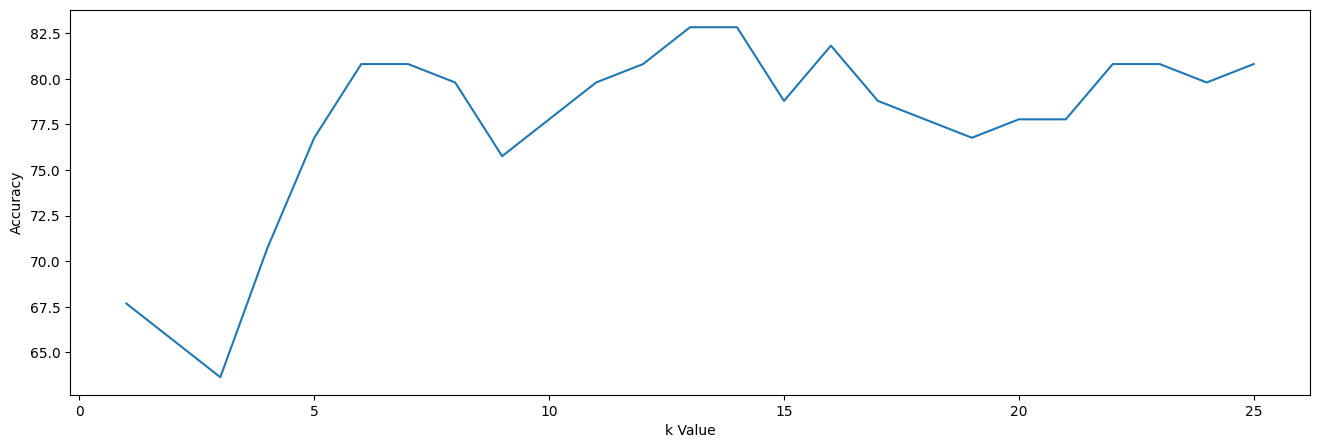

In [43]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    ## Create the model and fit the data to it
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    ## Predict the classification and print the confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100

    if verbosity == 1:
        print('\nk =', n_neighbors)
        print ('Actual'.rjust(35))
        print ('{} |  {}'.format('FEMALE'.rjust(30),'MALE'))
        print ('{}:     {}  |  {}'.format('Predicted FEMALE'.rjust(21), cm[0,0], cm[1,0]))
        print ('{}:      {}  |  {}'.format('Predicted MALE'.rjust(21), cm[0,1], cm[1,1]))
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
        print('Test Error: {:.2f}%'.format((1 - accuracy_score(y_pred, y_test))*100))


    return model, accuracy_val

accuracies = []
knn_limit = 25

## Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

## Access the KNN function and calculate the accuracy values for specified number of neighbors
model_k1, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=1, verbosity=1)
model_k3, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=3, verbosity=1)
model_k13, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=13, verbosity=1)
model_k14, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=14, verbosity=1)

## Store the necessary variables
cols_to_store = [i for i in range(len(model_k13.classes_)) if model_k13.classes_[i] == 1]
y_KNN_pred = model_k13.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

## Plot the results
plt.subplots(figsize=(16, 5))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

Analizing the graph, we conclude that the best $k$ value is $k=13$, since it yields the biggest value of accuracy and it's less computationally demanding, in comparison with $k=14$ (which yields the same accuracy).


**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

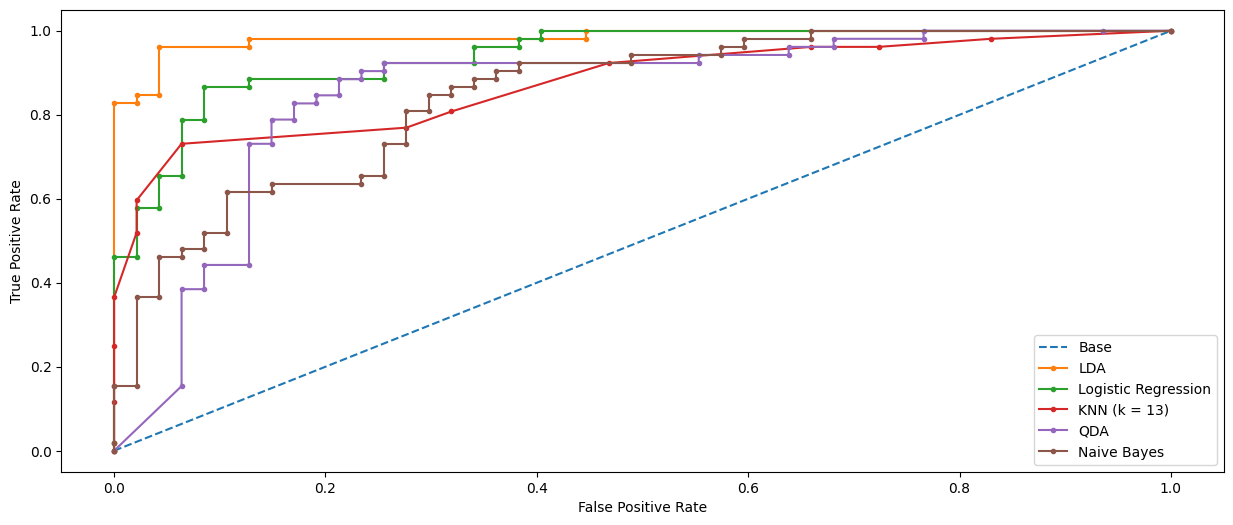

                      AUC
                LDA: 0.984
Logistic Regression: 0.939
       KNN (k = 13): 0.873
                QDA: 0.851
        Naive Bayes: 0.845


In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the model
plt.subplots(figsize=(15, 6))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN (k = 13)')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('KNN (k = 13)'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))

Idealy, we want to have $AUC=1$, meaning, we want to maximize the True Positive Rate and minimize the False Positive Rate. Therefore, we conclude that the best classification procedure is the Linear Discriminant Analysis (LDA), for the given seed and training/test data.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented.

This approach inolves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k-1 folds. The mean squared error, MSE1, is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set.

Definition from the course book   "An Introduction to Statistical Learning (with Applications in Python)"

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

<u>Comparing with Validation set approach</u>:
- Advantages:
1. When it comes to *variance*, the validation set approach directly depends on the training set size that is arbitrarily chosen, which means that improper sizes may lead to higher variances than those of the k-Fold CV.
2. Regarding *suitability*, the model we get from the validation set approach is tuned for a randomly chosen ratio between training and test dataset sizes, making it highly circumstantial and thus not as suitable for new data as a model obtained from the k-Fold CV is.
- Disadvantages:
1. In regards to *computational demand*, while the k-Fold CV computes k trainings and k tests (leading to k models), the validation set approach only performs each of those once, making it computationally less demanding than the former.

<u>Comparing with Leave One Out Cross-Validation</u>:
- Advantages:
1. When it comes to *variance*, k-Fold CV yields lower values than those of LOOCV. Due to the nature of the LOOCV method, training data is highly correlated between itself, which may lead to test errors with a high variance.
2. In regards to *computational demand*, k-Fold CV performs k trainings and tests, whereas LOOCV will perform these for each data point in our dataset. Thus, k-Fold CV has a lower computational demand, especially for large datasets.
- Disadvantages:
1. Concerning *bias*, the LOOCV method uses almost the entirety of the dataset for training, and, therefore, will have most of the observations, which means our model will be very close to that observed reality, leading to a lower bias. In contrast, the k-Fold CV will have a more biased result, since the training set size is not as large as those of the LOOCV.

## Section 4 -- Other Questions

**6)** In your group's opinion, what are the advantages and disadvantages of using a virtual environment when programming in Python?

As an advantage, everyone works with the same libraries (on the same versions), which eliminates the problem of compatibility. As a disadvantage, distributing the virtual environment was not as easy, and ensuring each library was compatible with each other (version downgrading was necessary sometimes) was also a difficulty.

 **7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.


In our perspective, we would rather work with Jupyter Notebooks because, even though it's a platform without real time updating and the capacity of working simultaneously in the same file, it was the one with the least problems regarding file and library management.

For example, the first time working with Google Colab, we had problems in running the code, not only because we didn't find out where to upload the dataset (searching for the content folder and finding out that the .csv file should not be in \sample_data was a challenge), but also because, when using the library versions of Google Colab, we faced errors in running the code that were not present in Jupyter Notebooks (since we had direct control over the version of each library).

Therefore, when there are no issues with library versions and file management is clear, using Google Colab may be a better idea. However, when specific library versions are required, Jupyter Notebooks comes out on top.

**8)** Enter your GitHub repository webpage.

https://github.com/oseNATiO/Assignment-1
(email rodrigo.j.amorim@tecnico.ulisboa.pt for access)